In [1]:
from keras.datasets import mnist # importing mnist dataset from keras package
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential,load_model
from keras import layers
from keras.layers import Dense
from keras.utils import np_utils # for one hot encoding
import time
import os

In [2]:
# https://keras.io/api/datasets/mnist/

# according to keras docs it the mnist dataset on using load_data return us tuple of numPy arrays:
(X_train, y_train), (X_test,y_test) = mnist.load_data()

# shape of out image
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

<h4> We can see that images are of 28,28 size</h4>
<h4> Total number of images in our train dataset is 60000</h4>
<h4> Total number of images in our test dataset is 10000</h4>

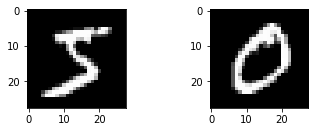

In [3]:
# let us visualize our input data 

# creating subplot 1
plt.subplot(221)
plt.imshow(X_train[0], cmap='gray')

# creating subplot 2
plt.subplot(222)
plt.imshow(X_train[1], cmap='gray')
# show the plot
plt.show()

In [4]:
# to reproduciblity we will set the seed to 42, 
# Why? Because, it is simply the answer to life, the universe and everything. 

np.random.seed(42)

# total number of pixel in our image
pixel_per_image = X_train.shape[1]*X_train.shape[2]

print(pixel_per_image)

784


In [5]:
# we will have to flattern our input data before inputing to model

# converting to to float32 beacuse keras model layer takes in float32 as input 
# whereas numpy creates float64 
X_train = X_train.reshape(X_train.shape[0],pixel_per_image).astype('float32')
X_test = X_test.reshape(X_test.shape[0],pixel_per_image).astype('float32')

# after reshaping of our pixel
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [6]:
# our image pixel ranges from 0-255
X_train.max()

255.0

In [7]:
# input images range from 0 to 225
# we will normalize pixel to 0-1

X_train = X_train / 255
X_test = X_test / 255

X_train.max(),X_test.max()

(1.0, 1.0)

In [8]:
# to see what our output variables contain
number_of_classes = len(np.unique(y_train))
print('Number of classes', number_of_classes)
np.unique(y_train)

Number of classes 10


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
# output variables contain numbers ranging from 0 to 9
# converting these output numbers to one hot encoding

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# output of one hot encoding
print(y_train[3])
print('shape of',y_train.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of (60000, 10)


In [10]:
# defining model
model = Sequential()

# adding layers to model
model.add(Dense(pixel_per_image, input_dim = pixel_per_image,activation = 'relu'))

# output layer with softmax activation
model.add(Dense(number_of_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics = ['accuracy'])

In [11]:
# fitting our model with 10 epoch 
start_time = time.time()
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs = 10 , verbose=2)
stop_time = time.time()

Epoch 1/10
1875/1875 - 3s - loss: 0.5975 - accuracy: 0.8594 - val_loss: 0.3368 - val_accuracy: 0.9113
Epoch 2/10
1875/1875 - 3s - loss: 0.3199 - accuracy: 0.9118 - val_loss: 0.2773 - val_accuracy: 0.9232
Epoch 3/10
1875/1875 - 3s - loss: 0.2721 - accuracy: 0.9240 - val_loss: 0.2440 - val_accuracy: 0.9328
Epoch 4/10
1875/1875 - 3s - loss: 0.2421 - accuracy: 0.9327 - val_loss: 0.2225 - val_accuracy: 0.9377
Epoch 5/10
1875/1875 - 4s - loss: 0.2189 - accuracy: 0.9388 - val_loss: 0.2057 - val_accuracy: 0.9437
Epoch 6/10
1875/1875 - 5s - loss: 0.2008 - accuracy: 0.9442 - val_loss: 0.1919 - val_accuracy: 0.9469
Epoch 7/10
1875/1875 - 4s - loss: 0.1854 - accuracy: 0.9482 - val_loss: 0.1766 - val_accuracy: 0.9493
Epoch 8/10
1875/1875 - 3s - loss: 0.1720 - accuracy: 0.9524 - val_loss: 0.1656 - val_accuracy: 0.9523
Epoch 9/10
1875/1875 - 3s - loss: 0.1605 - accuracy: 0.9556 - val_loss: 0.1570 - val_accuracy: 0.9550
Epoch 10/10
1875/1875 - 3s - loss: 0.1502 - accuracy: 0.9582 - val_loss: 0.1487 - 

In [12]:
print('Total time taken :', stop_time-start_time)

Total time taken : 34.935781955718994


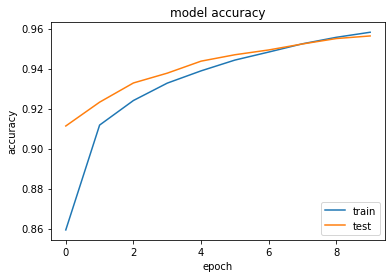

In [13]:
# plotting graph of model's accuracy 

# train accuracy
plt.plot(history.history['accuracy'])

# test accuracy 
plt.plot(history.history['val_accuracy'])

# setting the title of model
plt.title('model accuracy')

# setting the ylabel 
plt.ylabel('accuracy')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side
plt.legend(['train', 'test'], loc='lower right')

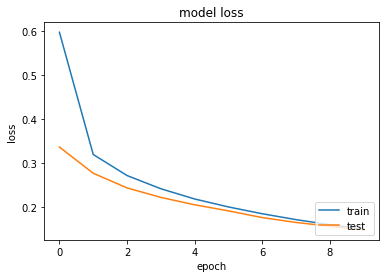

In [14]:
# plotting graph of model's loss 

# train loss
plt.plot(history.history['loss'])

# test loss 
plt.plot(history.history['val_loss'])

# setting the title of model
plt.title('model loss')

# setting the ylabel 
plt.ylabel('loss')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side
plt.legend(['train', 'test'], loc='lower right')

### Imporving the models performace

In [15]:
# defining model
model_1 = Sequential()

# adding layers to model
model_1.add(Dense(pixel_per_image, input_dim = pixel_per_image,activation = 'relu'))

# output layer with softmax activation
model_1.add(Dense(number_of_classes, activation = 'softmax'))

model_1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [16]:
# fitting our model with 10 epoch with batch size of 200
start_time = time.time()
history_1 = model_1.fit(X_train,y_train, validation_data=(X_test,y_test), 
                      batch_size = 200,
                      epochs = 10,
                      verbose = 2)
stop_time = time.time()

Epoch 1/10
300/300 - 2s - loss: 0.2808 - accuracy: 0.9209 - val_loss: 0.1407 - val_accuracy: 0.9594
Epoch 2/10
300/300 - 2s - loss: 0.1134 - accuracy: 0.9672 - val_loss: 0.0955 - val_accuracy: 0.9720
Epoch 3/10
300/300 - 1s - loss: 0.0719 - accuracy: 0.9793 - val_loss: 0.0782 - val_accuracy: 0.9756
Epoch 4/10
300/300 - 1s - loss: 0.0515 - accuracy: 0.9853 - val_loss: 0.0737 - val_accuracy: 0.9764
Epoch 5/10
300/300 - 1s - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0646 - val_accuracy: 0.9793
Epoch 6/10
300/300 - 1s - loss: 0.0275 - accuracy: 0.9923 - val_loss: 0.0585 - val_accuracy: 0.9823
Epoch 7/10
300/300 - 1s - loss: 0.0204 - accuracy: 0.9947 - val_loss: 0.0595 - val_accuracy: 0.9815
Epoch 8/10
300/300 - 1s - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.0594 - val_accuracy: 0.9804
Epoch 9/10
300/300 - 1s - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0564 - val_accuracy: 0.9817
Epoch 10/10
300/300 - 1s - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.0611 - val_accuracy: 0.9815

In [17]:
print('Total time taken by imporved model:', stop_time-start_time)

Total time taken by imporved model: 14.12975287437439


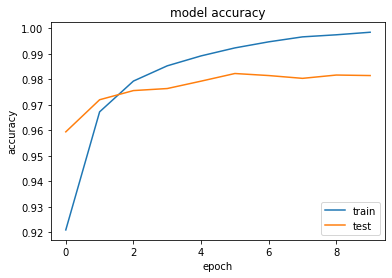

In [18]:
# plotting graph of model's accuracy 

# train accuracy
plt.plot(history_1.history['accuracy'])

# test accuracy 
plt.plot(history_1.history['val_accuracy'])

# setting the title of model
plt.title('model accuracy')

# setting the ylabel 
plt.ylabel('accuracy')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side
plt.legend(['train', 'test'], loc='lower right')

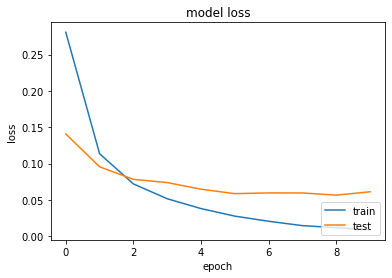

In [19]:
# plotting graph of model's loss 

# train loss
plt.plot(history_1.history['loss'])

# test loss 
plt.plot(history_1.history['val_loss'])

# setting the title of model
plt.title('model loss')

# setting the ylabel 
plt.ylabel('loss')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side

plt.legend(['train', 'test'], loc='lower right')

In [20]:
# saving the model
save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist.h5 


In [21]:
# saving the model
save_dir = "results/"
model_name = 'optimized_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/optimized_keras_mnist.h5 


## cnn model

In [22]:
#importing data from mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

# converting label data to categorical
y_train = keras.utils.to_categorical(y_train, number_of_classes)
y_test = keras.utils.to_categorical(y_test, number_of_classes)

In [23]:
# shape of train and test data
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [24]:
# defining model
cnn_model = keras.Sequential(
    [
        keras.Input(shape=((28,28,1))),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(number_of_classes, activation="softmax"),
    ]
)

cnn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [25]:
start_time = time.time()
cnn_history = cnn_model.fit(X_train, y_train, batch_size=200, epochs=15, validation_split=0.1)
end_time = time.time()

Epoch 1/15
270/270 [==============================] - 15s 55ms/step - loss: 0.4637 - accuracy: 0.8604 - val_loss: 0.0967 - val_accuracy: 0.9730
Epoch 2/15
270/270 [==============================] - 15s 56ms/step - loss: 0.1315 - accuracy: 0.9602 - val_loss: 0.0671 - val_accuracy: 0.9840
Epoch 3/15
270/270 [==============================] - 16s 61ms/step - loss: 0.0959 - accuracy: 0.9712 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 4/15
270/270 [==============================] - 16s 59ms/step - loss: 0.0797 - accuracy: 0.9759 - val_loss: 0.0471 - val_accuracy: 0.9873
Epoch 5/15
270/270 [==============================] - 16s 58ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0444 - val_accuracy: 0.9875
Epoch 6/15
270/270 [==============================] - 20s 73ms/step - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 7/15
270/270 [==============================] - 16s 59ms/step - loss: 0.0566 - accuracy: 0.9824 - val_loss: 0.0355 - val_accuracy:

In [26]:
print('Total time taken by cnn model:', end_time-start_time)

Total time taken by cnn model: 231.1942367553711


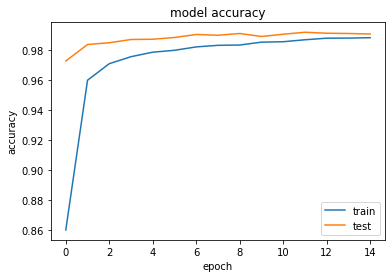

In [27]:
# plotting graph of model's accuracy 

# train accuracy
plt.plot(cnn_history.history['accuracy'])

# test accuracy 
plt.plot(cnn_history.history['val_accuracy'])

# setting the title of model
plt.title('model accuracy')

# setting the ylabel 
plt.ylabel('accuracy')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side
plt.legend(['train', 'test'], loc='lower right')

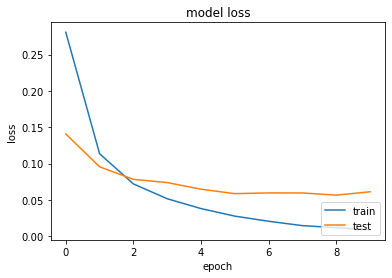

In [29]:
# plotting graph of model's loss 

# train loss
plt.plot(history_1.history['loss'])

# test loss 
plt.plot(history_1.history['val_loss'])

# setting the title of model
plt.title('model loss')

# setting the ylabel 
plt.ylabel('loss')

# setting xlabel
plt.xlabel('epoch')

# defining legend on lower right side

plt.legend(['train', 'test'], loc='lower right')

In [30]:
# saving the model
save_dir = "results/"
model_name = 'cnn_keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model_1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/cnn_keras_mnist.h5 
